In [ ]:
# Given pickup and dropoff locations, the pickup timestamp, and the passenger count, the objective is to predict the fare of the taxi ride using Random Forest

In [4]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime

In [5]:
data=pd.read_csv('E:\Imarticus\Machine Learning\Supervised Learning\Random_forest\Taxi Fare Prediction\Dataset/TaxiFare.csv')

In [6]:
df=pd.DataFrame(data)

In [7]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


# EDA

In [8]:
df.shape

(50000, 8)

In [9]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [53]:
# Numerical columns

num_cols = list(df.select_dtypes(exclude = 'O'))
print('Numerical Columns are :',num_cols)

Numerical Columns are : ['amount', 'no_of_passenger', 'distance', 'weekend', 'Early Morning', 'Evening', 'Late Night', 'Morning', 'Night', 'Noon']


In [54]:
# Categorical columns

cat_cols = list(df.select_dtypes(include = 'O'))
print('Categorical Columns are :',cat_cols)

Categorical Columns are : []


In [11]:
df['no_of_passenger'].unique()

array([1, 2, 3, 6, 5, 4, 0], dtype=int64)

In [12]:
df['no_of_passenger'].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

C:\Users\ajaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_passenger', ylabel='count'>

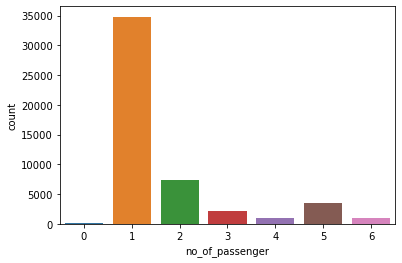

In [13]:
sns.countplot(df['no_of_passenger'])

<AxesSubplot:>

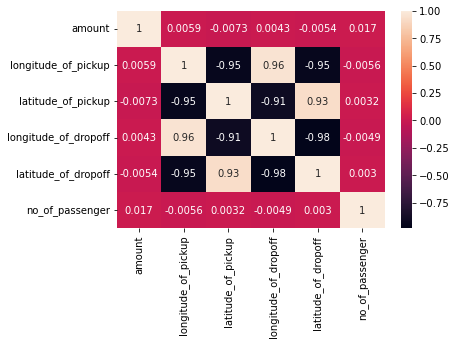

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [16]:
df['date_time_of_pickup']=df.date_time_of_pickup.str.replace('UTC'," ")

In [17]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00,-73.946062,40.777567,-73.953450,40.779687,2


In [18]:
df.drop(df[df['amount']<=0].index,axis=0,inplace=True)

In [19]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [20]:
df['distance']=pd.DataFrame( (df['latitude_of_pickup']-df['latitude_of_dropoff'])**2 + (df['longitude_of_pickup']-df['longitude_of_dropoff'])**2 )**0.5

In [21]:
df.drop(["longitude_of_pickup","latitude_of_pickup","latitude_of_dropoff","longitude_of_dropoff"],axis=1,inplace=True)

In [22]:
df

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance
0,26:21.0,4.5,2009-06-15 17:26:21,1,0.009436
1,52:16.0,16.9,2010-01-05 16:52:16,1,0.079696
2,35:00.0,5.7,2011-08-18 00:35:00,2,0.013674
3,30:42.0,7.7,2012-04-21 04:30:42,1,0.025340
4,51:00.0,5.3,2010-03-09 07:51:00,1,0.019470
...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15,1,0.045782
49996,19:18.0,7.5,2015-06-22 17:19:18,1,0.008049
49997,53:00.0,6.9,2011-01-30 04:53:00,1,0.020574
49998,09:00.0,4.5,2012-11-06 07:09:00,2,0.007686


In [23]:
df.drop('unique_id',axis=1,inplace=True)

In [24]:
df[['Date','time']]=df['date_time_of_pickup'].str.split(expand=True)
df.head()

,amount,date_time_of_pickup,no_of_passenger,distance,Date,time
0,4.5,2009-06-15 17:26:21,1,0.009436,2009-06-15,17:26:21
1,16.9,2010-01-05 16:52:16,1,0.079696,2010-01-05,16:52:16
2,5.7,2011-08-18 00:35:00,2,0.013674,2011-08-18,00:35:00
3,7.7,2012-04-21 04:30:42,1,0.025340,2012-04-21,04:30:42
4,5.3,2010-03-09 07:51:00,1,0.019470,2010-03-09,07:51:00


In [25]:
df['Date']=pd.to_datetime(df['Date'] , errors='coerce')
df['time']=pd.to_datetime(df['time'] , errors='coerce')
df

,amount,date_time_of_pickup,no_of_passenger,distance,Date,time
0,4.5,2009-06-15 17:26:21,1,0.009436,2009-06-15,2022-03-16 17:26:21
1,16.9,2010-01-05 16:52:16,1,0.079696,2010-01-05,2022-03-16 16:52:16
2,5.7,2011-08-18 00:35:00,2,0.013674,2011-08-18,2022-03-16 00:35:00
3,7.7,2012-04-21 04:30:42,1,0.025340,2012-04-21,2022-03-16 04:30:42
4,5.3,2010-03-09 07:51:00,1,0.019470,2010-03-09,2022-03-16 07:51:00
...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15,1,0.045782,2013-06-12,2022-03-16 23:25:15
49996,7.5,2015-06-22 17:19:18,1,0.008049,2015-06-22,2022-03-16 17:19:18
49997,6.9,2011-01-30 04:53:00,1,0.020574,2011-01-30,2022-03-16 04:53:00
49998,4.5,2012-11-06 07:09:00,2,0.007686,2012-11-06,2022-03-16 07:09:00


In [26]:
week=[]       
for i in df['Date']:
    week.append(i.dayofweek)    
df['weekday']=week   

In [27]:
d=[]
for i in df['weekday']:
    if i>=4:
        d.append(1)
    else:
        d.append(0)
df['weekend']=d
df.drop('weekday',axis=1,inplace=True)

In [28]:
df['Session'] = (df['time'].dt.hour % 24 + 4) // 4
df['Session'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [29]:
df.drop('date_time_of_pickup',axis=1,inplace=True)
df.drop('time',axis=1,inplace=True)

In [30]:
df.head()

,amount,no_of_passenger,distance,Date,weekend,Session
0,4.5,1,0.009436,2009-06-15,0,Evening
1,16.9,1,0.079696,2010-01-05,0,Evening
2,5.7,2,0.013674,2011-08-18,0,Late Night
3,7.7,1,0.025340,2012-04-21,1,Early Morning
4,5.3,1,0.019470,2010-03-09,0,Early Morning


In [31]:
df1=pd.get_dummies(df['Session'])

In [32]:
df=pd.concat([df,df1],axis=1)
df.drop('Session',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)

In [56]:
df.head(5)

,amount,no_of_passenger,distance,weekend,Early Morning,Evening,Late Night,Morning,Night,Noon
0,4.5,1,0.009436,0,0,1,0,0,0,0
1,16.9,1,0.079696,0,0,1,0,0,0,0
2,5.7,2,0.013674,0,0,0,1,0,0,0
3,7.7,1,0.025340,1,1,0,0,0,0,0
4,5.3,1,0.019470,0,1,0,0,0,0,0


In [57]:
df.drop(df[df.no_of_passenger == 0].index,inplace=True)

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
s=MinMaxScaler()

# Models

# Linear Regression

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x=df.drop('amount',axis=1)
y=df['amount']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x , y , test_size=0.30,random_state=0)

In [39]:
x_train= s.fit_transform(x_train)    
x_test= s.transform(x_test)

In [40]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [42]:
LR.score(x_train,y_train)

0.0026703702824513176

In [60]:
LR.score(x_test,y_test)

0.002766485200126234

# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor as dtr

In [62]:
dtree=dtr(max_depth=6)
dtree=dtree.fit(x_train,y_train)

In [63]:
y_hat=dtree.predict(x_test)

In [64]:
print(dtree.score(x_train,y_train))

0.7060437425438291


In [65]:
print(dtree.score(x_test,y_test))

0.6716681953085193


In [66]:
error=y_hat-y_test

<AxesSubplot:xlabel='amount', ylabel='amount'>

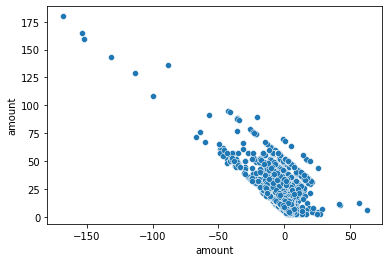

In [49]:
sns.scatterplot(x=error , y=y_test)

# Random_Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, 
                               random_state=0, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
rf.fit(x_train, y_train)
#Train data
rf.score(x_train,y_train)*100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished


86.33796112832903

In [68]:
rf.score(x_test,y_test)*100

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished


66.4576894633533